<a href="https://colab.research.google.com/github/johnny9210/Stock/blob/main/Stock_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install konlpy

     |████████████████████████████████| 19.4MB 53.3MB/s 
     |████████████████████████████████| 92kB 11.0MB/s 
     |████████████████████████████████| 450kB 40.0MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
from konlpy.tag import *
import pandas as pd
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [ ]:
okt = Okt()
kkma = Kkma()

In [ ]:
data = pd.read_csv('/content/news.csv',encoding='utf-8')


In [ ]:
data

,code,name,date,subject,content
0,5930,삼성전자,2021.07.17,[단독] 삼성 대미 반도체 투자 결국 6개월~1년 지연,텍사스 제2후보지역 착공 내년 1Q\n제1후보지서는 올해 2Q 공사 목표\n상업가동...
1,5930,삼성전자,2021.07.16,"인텔, '파운드리' 공격 투자 지속..삼성전자도 '경계'","""인텔, 글로벌파운드리 인수 협상 진행 중""\n인수대금 약 34조 추정..인텔 역사..."
2,5930,삼성전자,2021.07.16,"TSMC, 삼성과 격차 더 벌리는데...총수 장기 부재로 전략적 결단 실종",[샌드위치 신세된 삼성]\nTSMC 2분기 영업익 6조 육박\n후발주자 추격 멀찍이...
3,5930,삼성전자,2021.07.16,"""기업가치 10조 잠재력 있다"" 삼성 600억 투자한 회사는?",인게임 앱 제작 지원 업체\n메타버스 생태계 활용성 주목\n\n삼성전자의 투자 자회...
4,5930,삼성전자,2021.07.16,"""삼성, 美 제2파운드리 부지로 텍사스 중부 검토"" -로이터",미국 텍사스주 오스틴에 있는 삼성전자 팹 공장/사진=삼성전자 홈페이지\n삼성전자가 ...
...,...,...,...,...,...
504,68270,셀트리온,2021.06.14,엎치락뒤치락 코스피…셀트리온 3형제 강세,셀트리온 장 초반 4%대 상승\n코스닥 상승 출발\n[이미지출처=연합뉴스]\n\n\...
505,68270,셀트리온,2021.06.14,"셀트리온 ""코로나19 치료제 렉키로나, 3상서 효능 안전성 입증""",셀트리온 코로나 치료제 임상 3상서 중증 악화율 70% 이상 감소.[사진 = 연합]...
506,68270,셀트리온,2021.06.14,[속보]셀트리온 '렉키로나' 글로벌 임상 3상 효능·안전성 입증,[머니투데이 안정준 기자] 셀트리온은 코로나19 항체 치료제 '렉키로나'의 글로벌 ...
507,68270,셀트리온,2021.06.14,"[속보]셀트리온 “렉키로나주, 중증환자 발생률 70% 감소시켜”",“고위험군 환자 대상으로는 72% 감소”\n[이데일리 왕해나 기자] 셀트리온(068...


In [ ]:
def word_cloud(name,date):
  data = pd.read_csv('/content/news.csv',encoding='utf-8')

  noun = okt.nouns(''.join(data[(data['name']==name)&(data['date']==date)]['content']))

  # 단어 개수 2글자 이상 제한
  noun_2=[]
  for i, v in enumerate(noun):
    if len(v)>1:
      noun_2.append(v)

  #불용어 추가적으로 더 지정
  stopwords = ['셀트리온']
  
  for i in noun_2:
    if i in stopwords:
      noun_2.remove(i)
  
  
  count=Counter(noun_2)


  noun_list = count.most_common(30)
  list_=[]
  for v in noun_list:
    list_.append(v)

  wordcloud = WordCloud(font_path='/content/NanumGothic.ttf',width=800,height=1000,background_color='black')
  wordcloud.generate_from_frequencies(dict(list_))
  plt.imshow(wordcloud)

  return wordcloud.to_file('word.png')

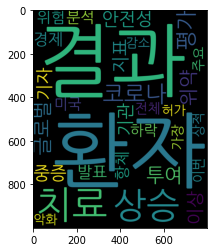

In [ ]:
word_cloud('셀트리온','2021.06.14')